In [2]:
%matplotlib notebook
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image               #Converting images into arrays
import seaborn as sns                 #For Regression
import matplotlib.patches as mpatches #  For waffle Charts
import folium                       #For Geographical maps 
from wordcloud import WordCloud, STOPWORDS

from __future__ import print_function
df_can = pd.read_excel(
    'https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',
    sheet_name= 'Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
years = list(range(1980,2014))
#Find sum
df_can['Total'] = df_can[years].sum(axis=1)

#Sort
df_can.sort_values(['Total'],ascending= False, axis = 0, inplace = True)

#Check if the rows exist
df_can.head() 

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
79,Immigrants,Foreigners,India,935,Asia,5501,Southern Asia,902,Developing regions,8880,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
36,Immigrants,Foreigners,China,935,Asia,906,Eastern Asia,902,Developing regions,5123,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
183,Immigrants,Foreigners,United Kingdom of Great Britain and Northern I...,908,Europe,924,Northern Europe,901,Developed regions,22045,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
136,Immigrants,Foreigners,Philippines,935,Asia,920,South-Eastern Asia,902,Developing regions,6051,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
130,Immigrants,Foreigners,Pakistan,935,Asia,5501,Southern Asia,902,Developing regions,978,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


<IPython.core.display.Javascript object>


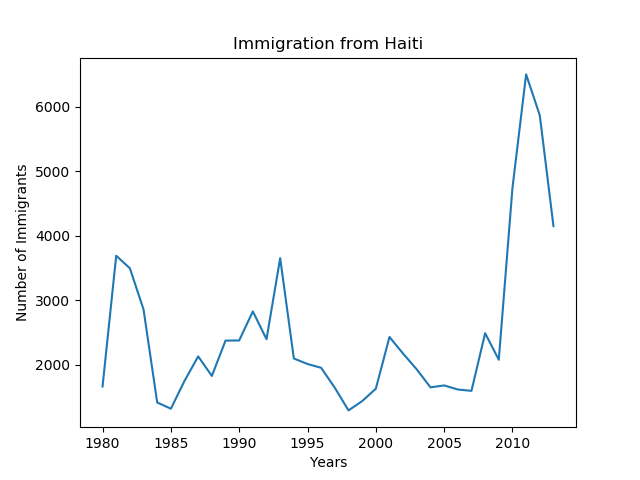

In [3]:
#Line Plot
df_canada= df_can.set_index('OdName')
df_canada.loc['Haiti',years].plot(kind='line')
plt.title ('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

In [106]:
#Finding top 5 and transposing to make it vertical
df_top5= df_canada.head()
df_top5=df_top5[years].transpose()
df_top5.head()


OdName,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


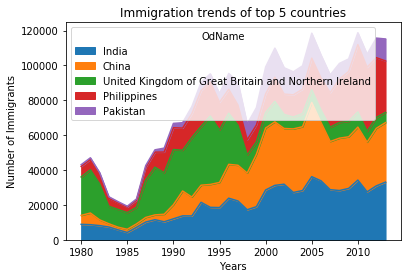

In [107]:
#Area plot 
df_top5.plot(kind='area')
plt.title ('Immigration trends of top 5 countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

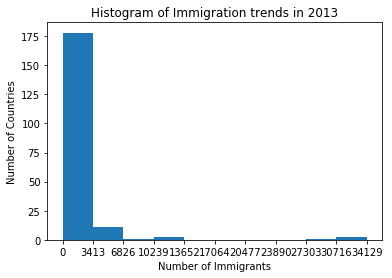

In [115]:
#Histogram 

#Align the bins 
count, bin_edges = np.histogram(df_canada[2013])

df_canada[2013].plot(kind='hist',xticks=bin_edges)
plt.title ('Histogram of Immigration trends in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')
plt.show()


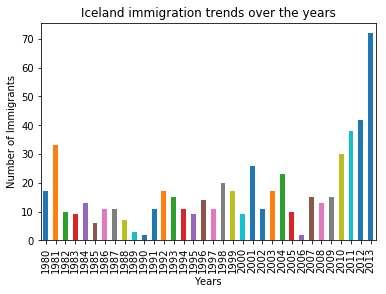

In [117]:
#Bar chart 

df_iceland = df_canada.loc['Iceland',years]
df_iceland.plot(kind='bar')
plt.title ('Iceland immigration trends over the years')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

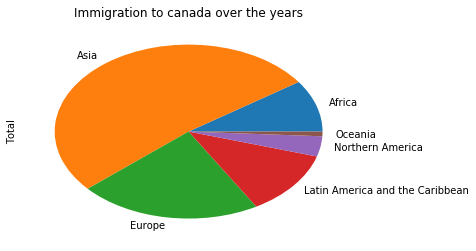

In [46]:
# Pie Chart
df_continents = df_canada.groupby('AreaName', axis =0).sum()

df_continents['Total'].plot(kind='pie')
plt.title ('Immigration to canada over the years')

plt.show()


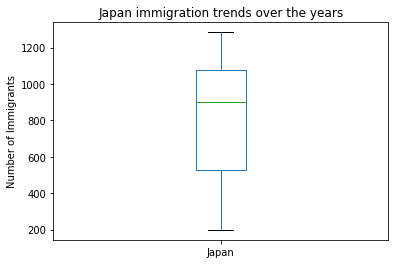

In [128]:
# Box plot

df_japan= df_canada.loc[['Japan'],years].transpose()

df_japan.plot(kind='box')
plt.title ('Japan immigration trends over the years')
plt.ylabel('Number of Immigrants')
plt.show()

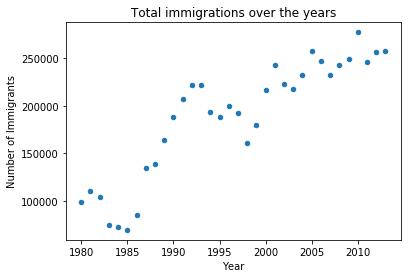

In [83]:
#Scatter plot

#Columnwise sum
df_total1= df_can[years].sum()
df_total1=df_total1.to_frame()
df_total1.columns=['total']
df_total1['years']=years
df_total1.head()


df_total1.plot(kind='scatter',
             x='years',
              y='total')
plt.title ('Total immigrations over the years')
plt.ylabel('Number of Immigrants')
plt.xlabel('Year')
plt.show()


<IPython.core.display.Javascript object>


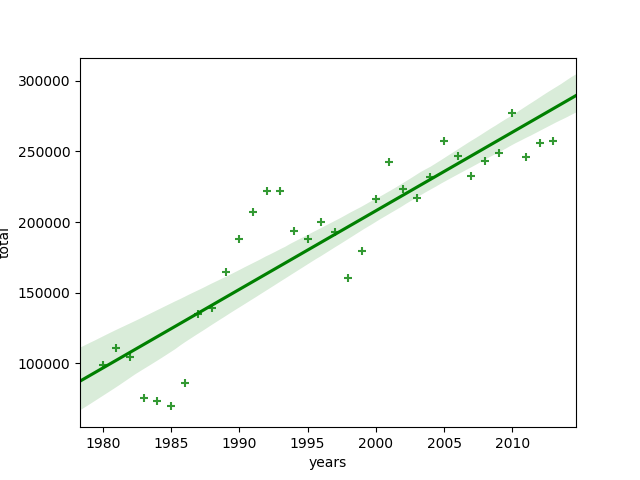

In [89]:
#Regression plots
ax= sns.regplot(x='years',y='total',data=df_total1,color='green',marker='+')

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<IPython.core.display.Javascript object>


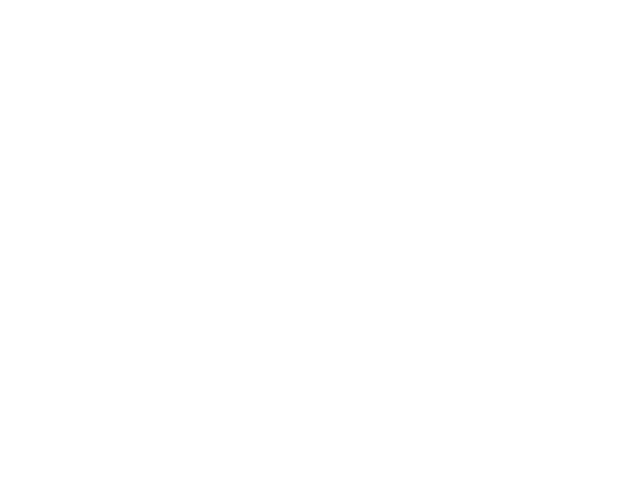

<IPython.core.display.Javascript object>


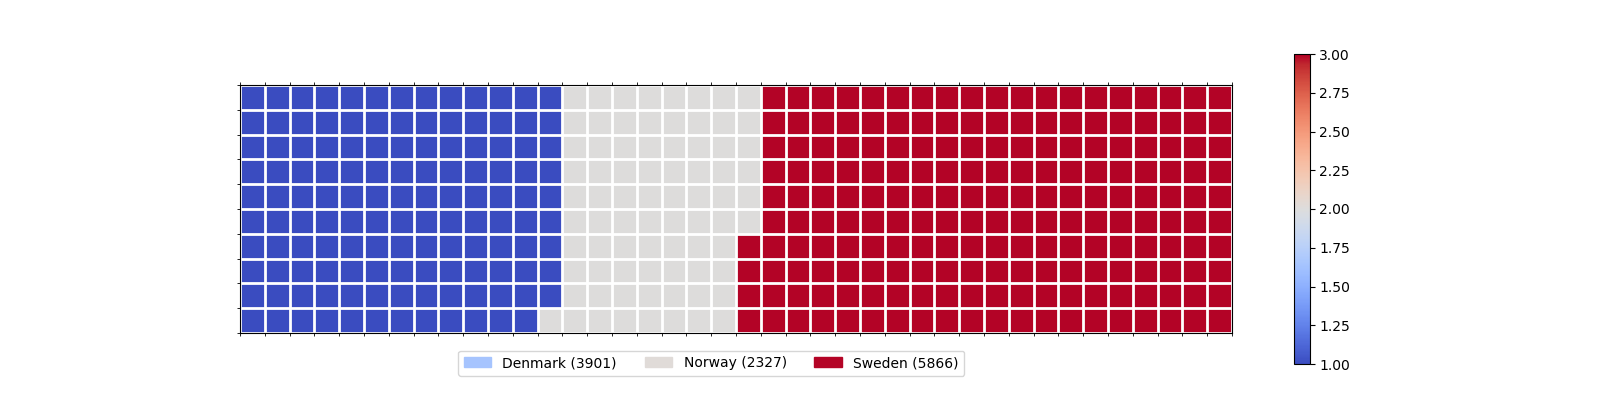

In [97]:
#Waffle Chart

def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    

width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

create_waffle_chart(categories, values, height, width, colormap)
    

<IPython.core.display.Javascript object>


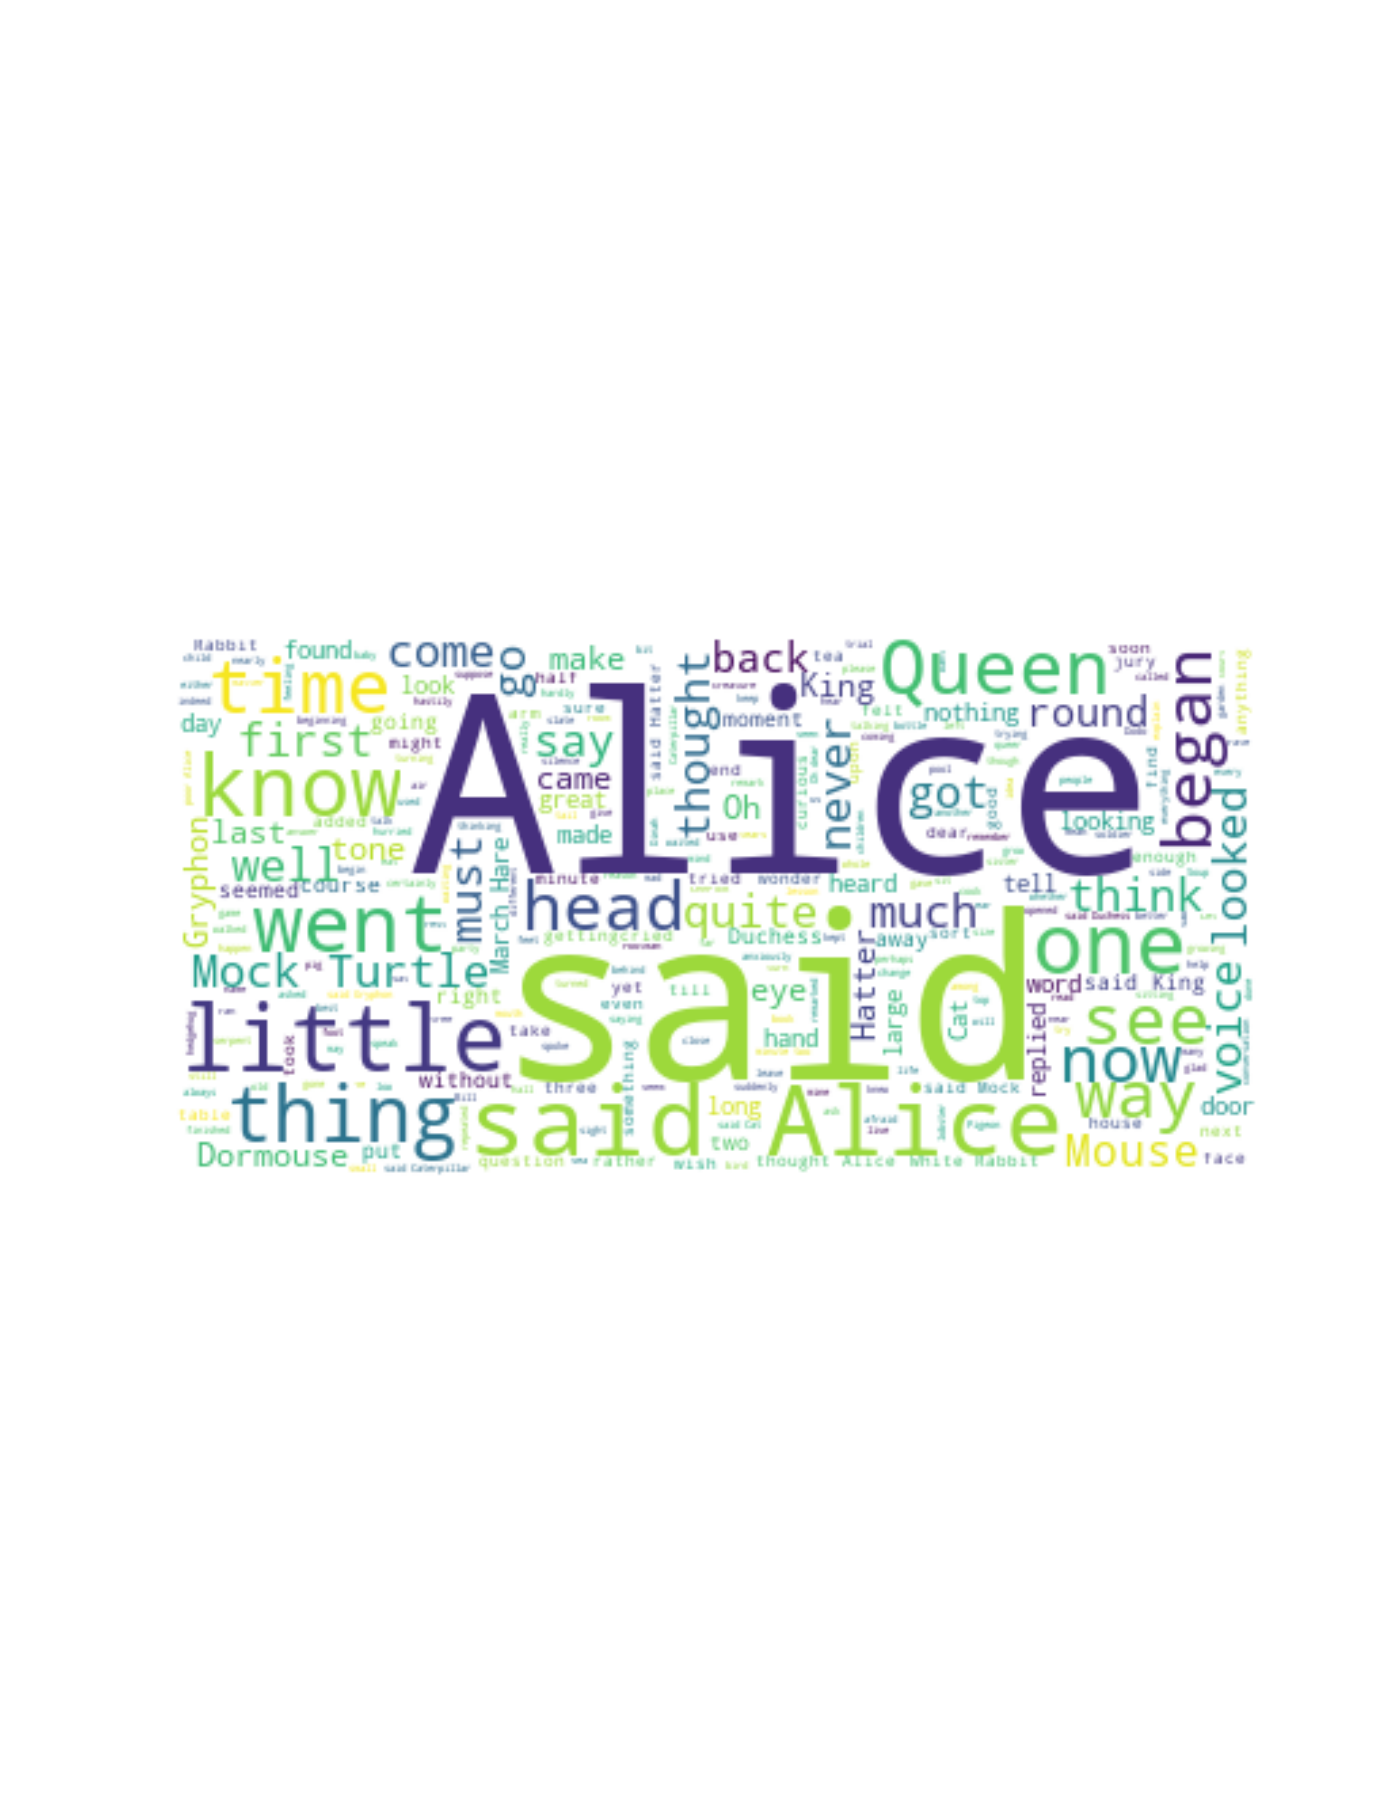

<IPython.core.display.Javascript object>


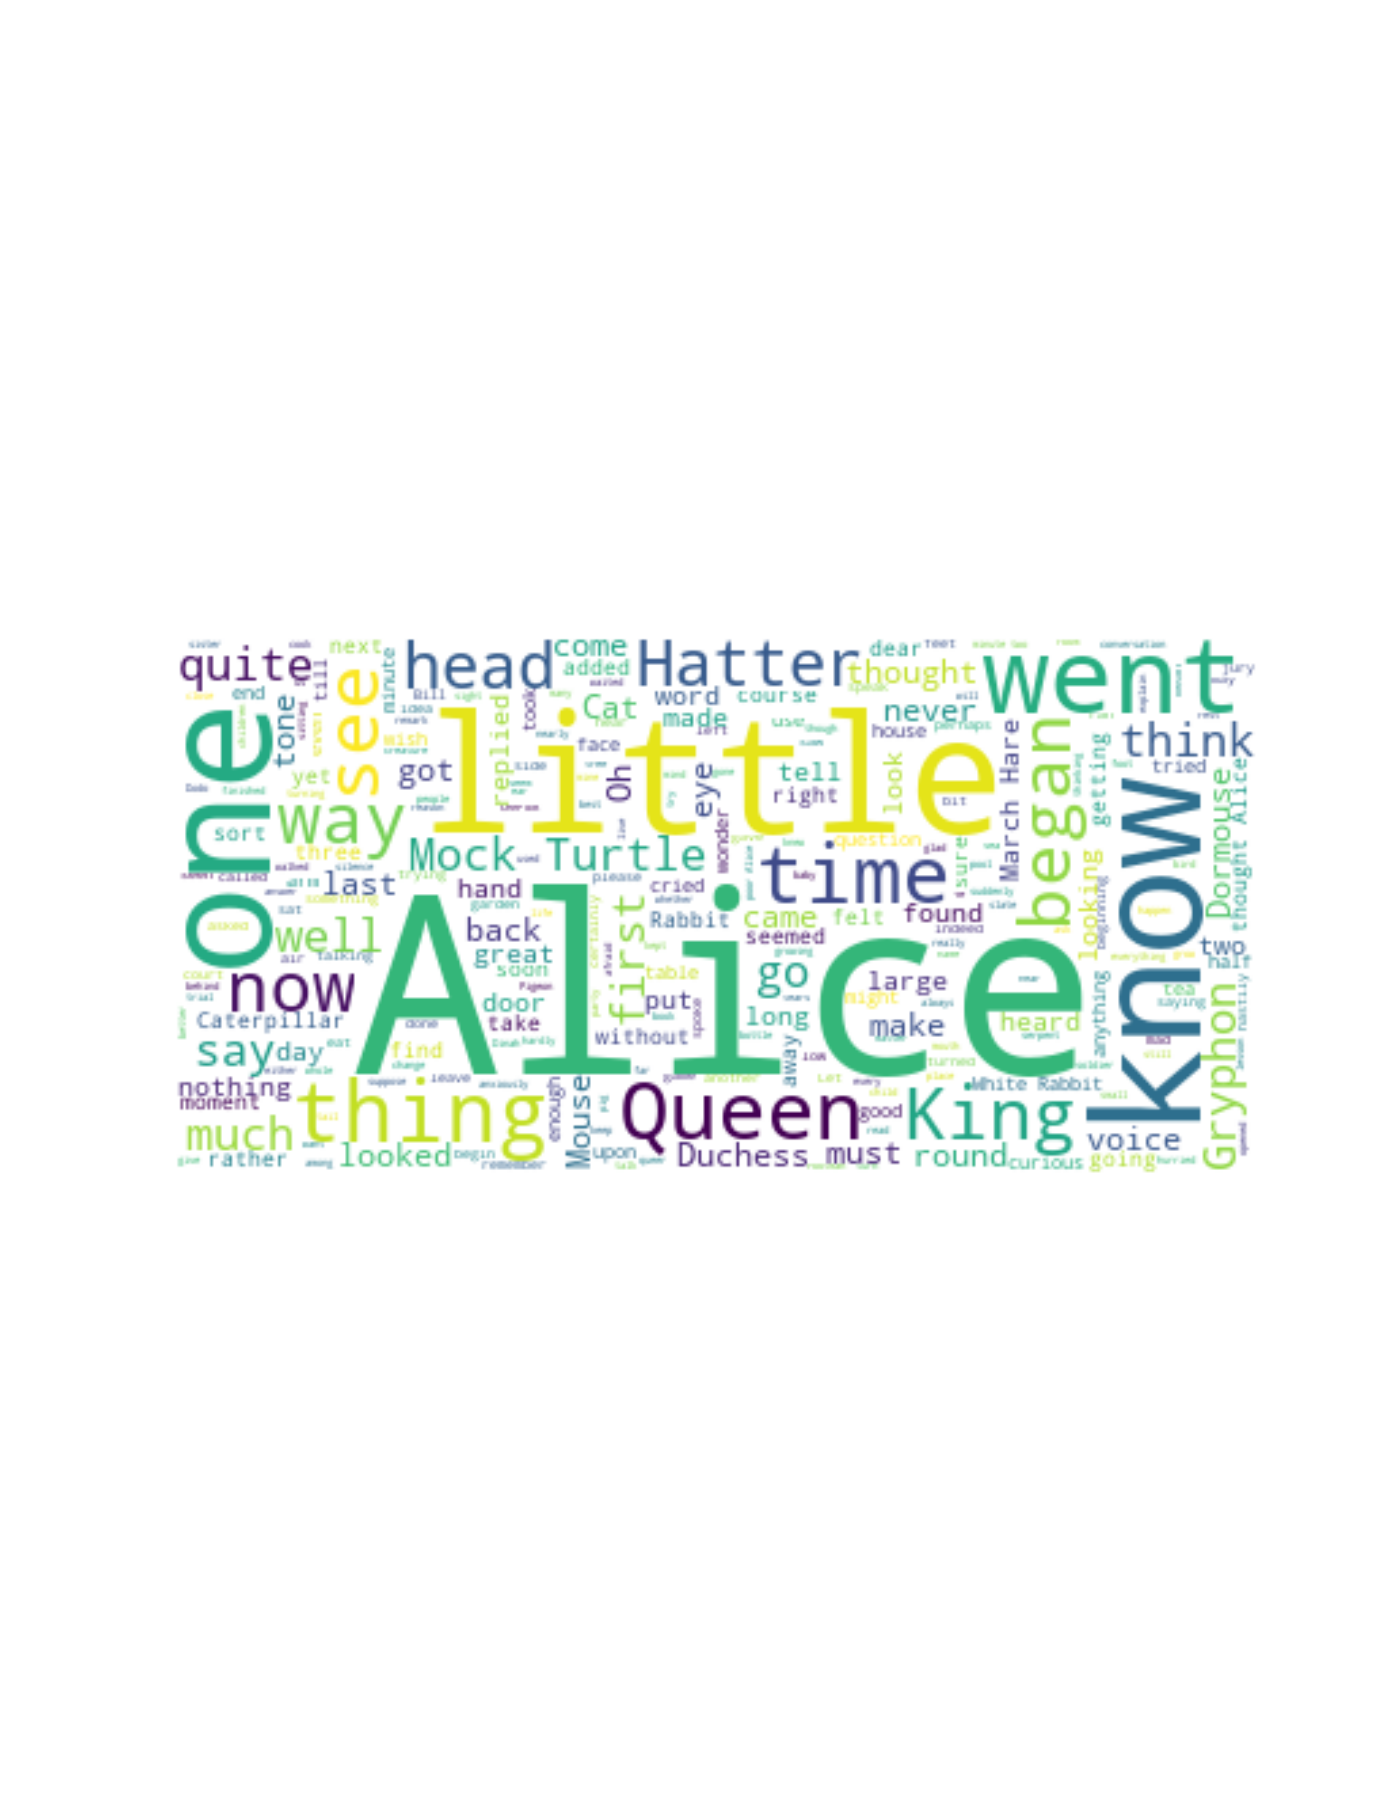

In [12]:
#Word Clouds

alice_novel = open('alice.txt', 'r').read()
stopwords = set(STOPWORDS)

# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()



stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


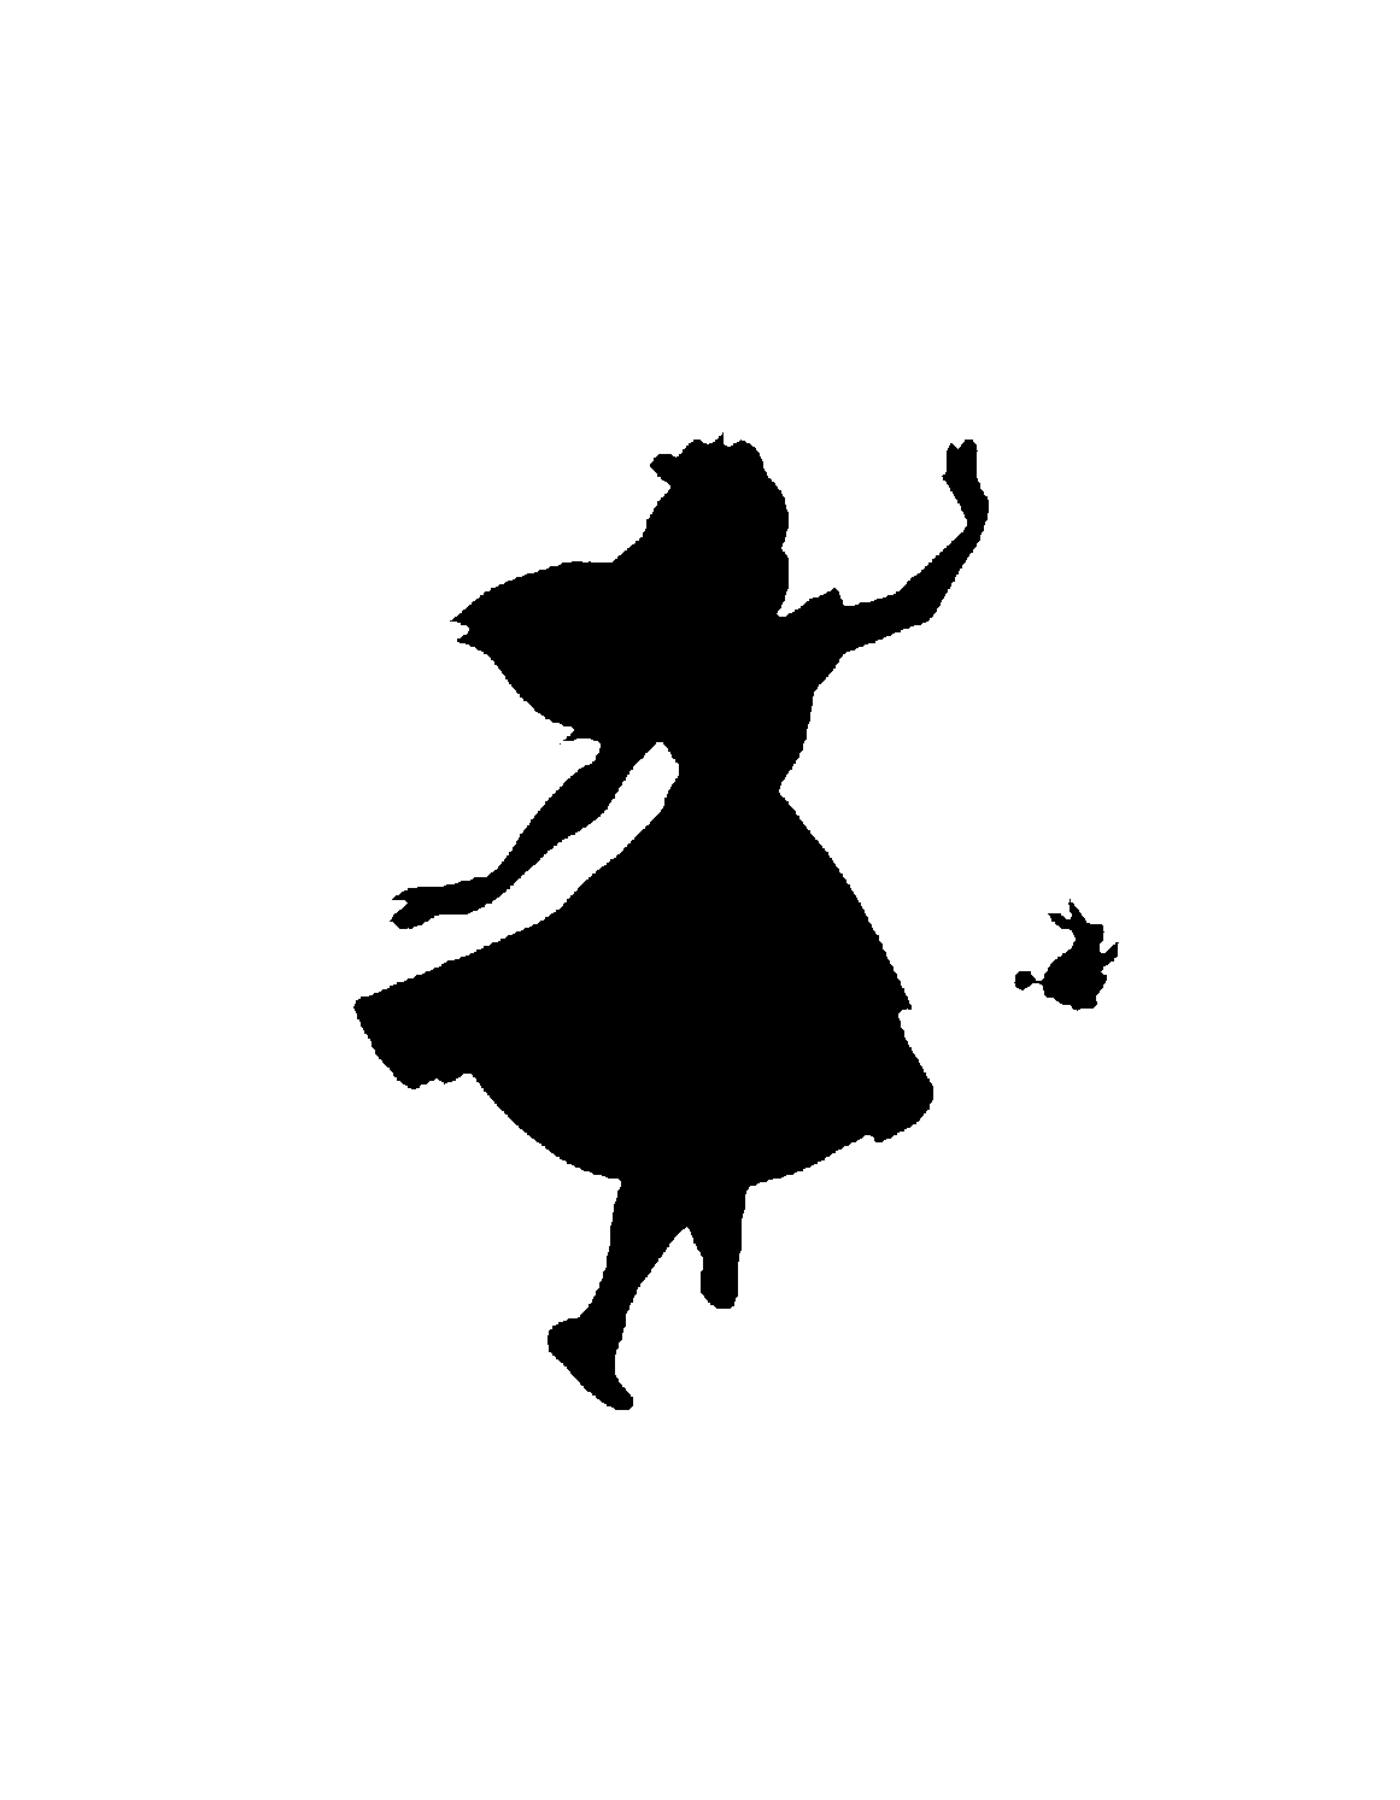

<IPython.core.display.Javascript object>


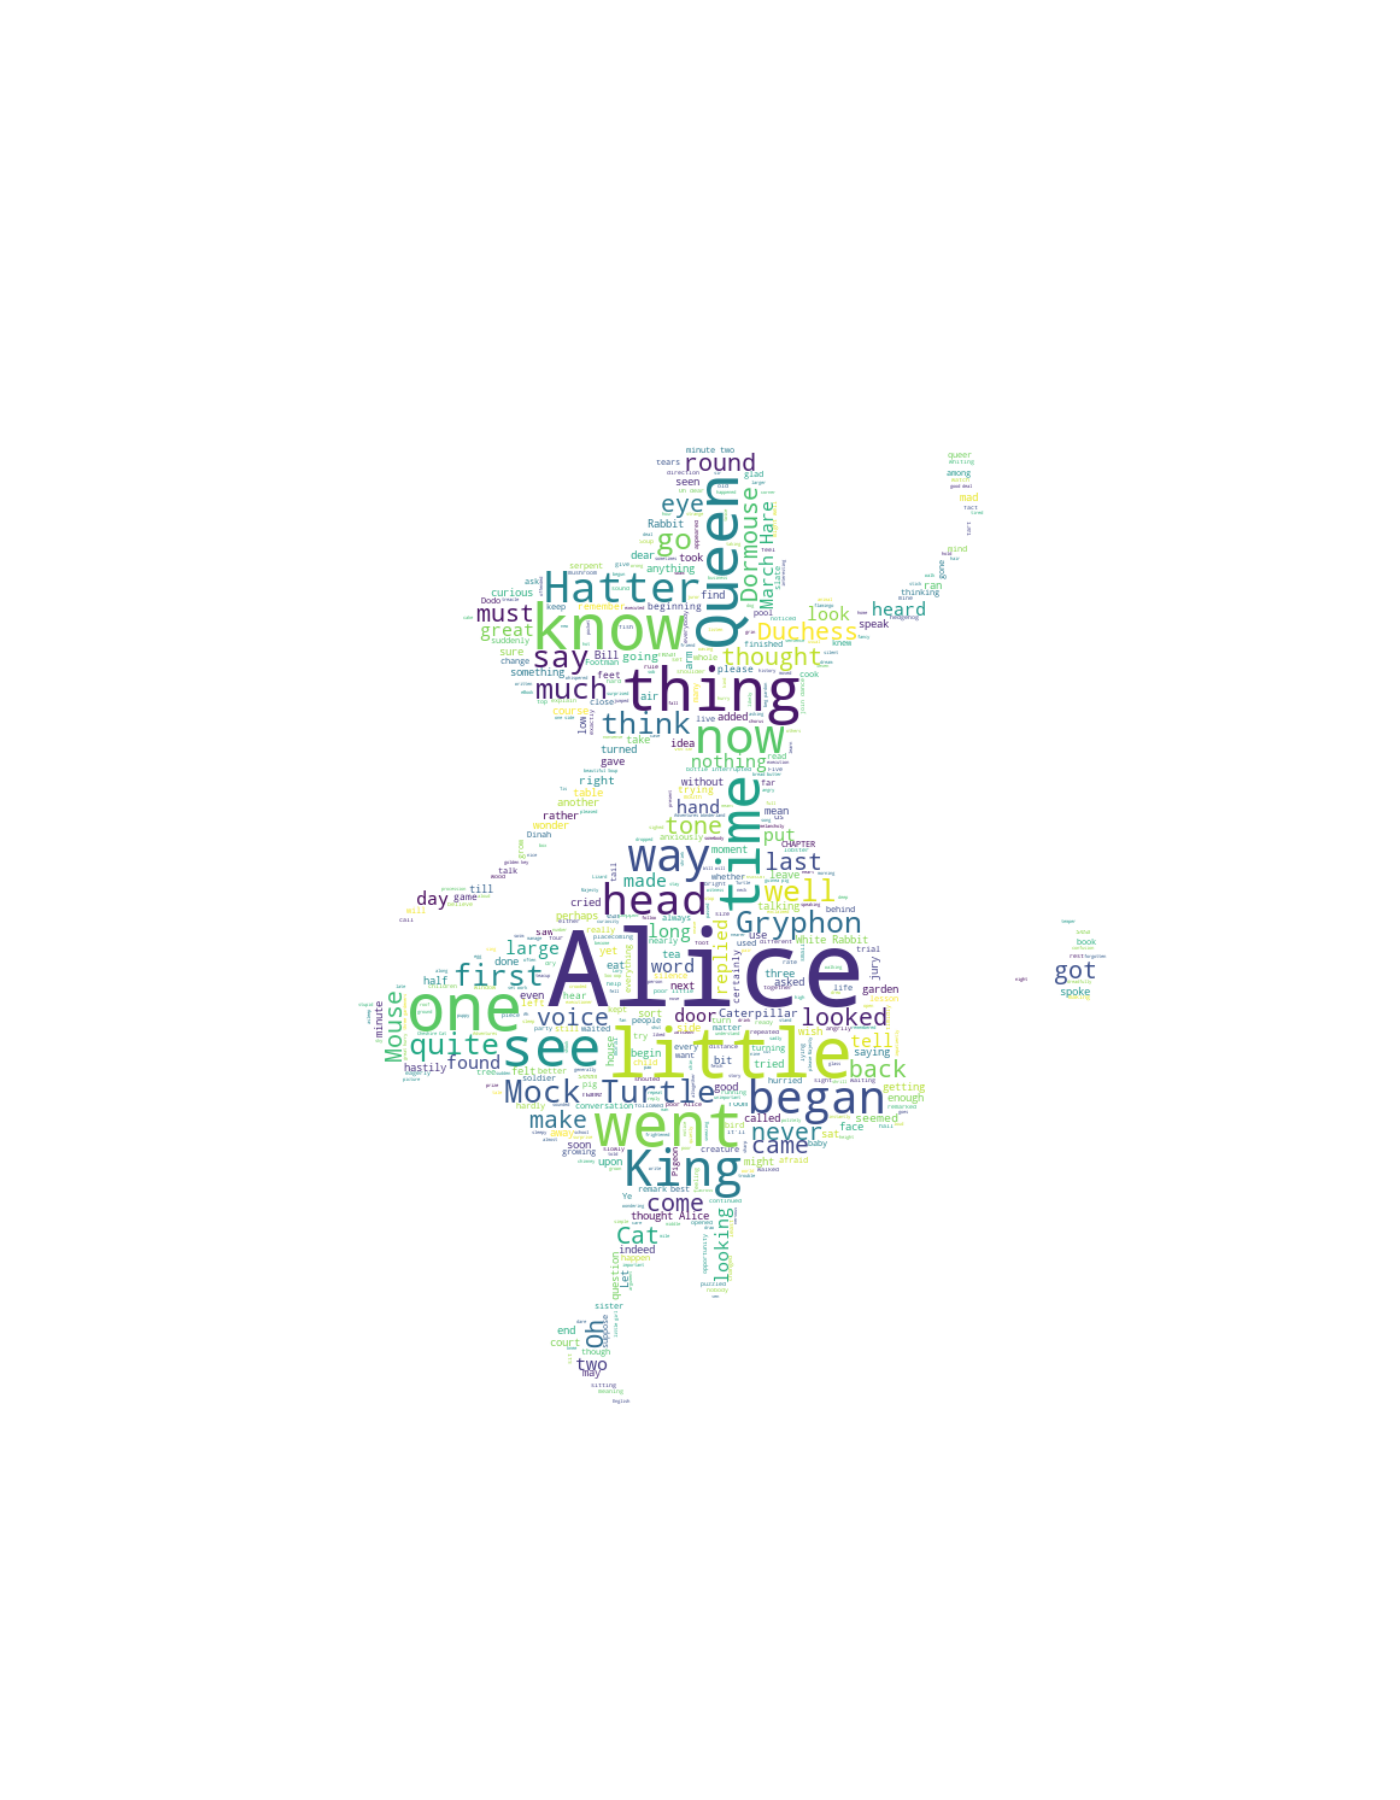

In [17]:
#wordcloud using mask

# save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()
    

In [17]:
#Choropleth map

world_map= folium.Map(
zoom_start=2,
tiles='Mapbox Bright')

df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

#Geojson file - Gives descripton of the country

world_geo = r'world-countries.json'
world_map.choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)
world_map

C:\Users\Hp Pc\Anaconda3\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
